
# **Real or Fake News Detection**





This notebook is explained with the following models,

Logistic regression,
Decision tree,
Stochastic gradient descent classifier,
Multinomial Naive Bayes,
Linear SVC,
Random Forest,
K nearest neighbor.
Comparision of each model performance is evaluated using Accuracy from confusion matrix.
Vectorizers used with models for comparision: Count vectorizer and TFIDF vectorizer.

Best model is chosen with respect to accuracy comparision using pipeline automation.

Text preprocessing techniques:Lemmatization is used.



In [2]:
#Importing all the required libraries 
import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from wordcloud import WordCloud,STOPWORDS
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import re,string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
%%time
true_data =pd.read_csv('/content/gdrive/My Drive/sample datasets/True.csv',encoding ='utf8')
fake_data =pd.read_csv('/content/gdrive/My Drive/sample datasets/Fake.csv',encoding ='utf8')



CPU times: user 1.34 s, sys: 492 ms, total: 1.83 s
Wall time: 5.2 s


## **Dataset Description**
This data has 2 CSV files where one dataset contains fake news and the other contains real news with 23481  and 21417 records each.There is no target column for real and fake news present in the both csv files.Hence added a type column with value 0 for fake and 1 for real in both the datasets after loading into the notebook and merged .


1.  title- lists news headlines
2.  text- lists news article in detail
3.subject- the type of news
4.date- the date the news was published




In [5]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_data.shape


(21417, 4)

In [7]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake_data.shape

(23481, 4)

In [9]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
true_data["type"]=1
fake_data["type"]=0   #adding a column to both true and fake dataset which is the target column to classify if its real or fake news based on binaries 1 for real and 0 for fake.

In [12]:
true_data.describe(include='all') #Summary statistics

,title,text,subject,date,type
count,21417,21417,21417,21417,21417.0
unique,20826,21192,2,716,NaN
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",NaN
freq,14,8,11272,182,NaN
mean,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,1.0


In [13]:
fake_data.describe(include='all')

,title,text,subject,date,type
count,23481,23481,23481,23481,23481.0
unique,17903,17455,6,1681,NaN
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",NaN
freq,6,626,9050,46,NaN
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0


In [14]:
fake_data.date.unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'December 18, 2017', 'December 14, 2017', 'December 8, 2017'],
      dtype=object)

In [15]:
true_data.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [16]:
fake_data.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [17]:
merged_data = pd.concat([true_data, fake_data]).reset_index(drop=True) #Merging of real and fake datasets.

In [18]:
merged_data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [19]:
merged_data.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [20]:
merged_data.tail()

,title,text,subject,date,type
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [21]:
merged_data.shape

(44898, 5)

In [22]:
merged_data.info() #no nulls present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   type     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### **Exploratory Data Analysis and Data preprocessing**

In [23]:
merged_data[['type','title','text','subject']].groupby(['type','subject']).count()

title   text
type subject                      
0    Government News   1570   1570
     Middle-east        778    778
     News              9050   9050
     US_News            783    783
     left-news         4459   4459
     politics          6841   6841
1    politicsNews     11272  11272
     worldnews        10145  10145

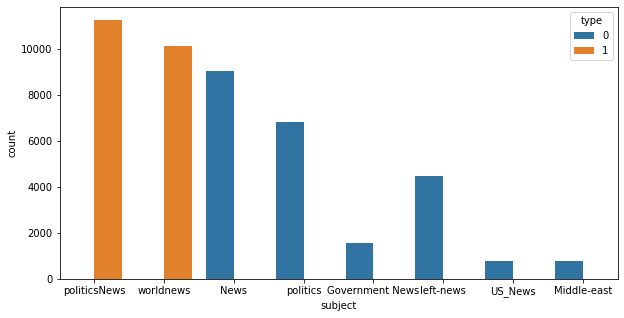

In [24]:

plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "type", data=merged_data)

The dataset has more political news ,followed by world news and others.Its been observed that fake news has all categories where as real has only politics and world news.Few categories are redundant as we see policsnews ,politics,government news all represent the same meaning.

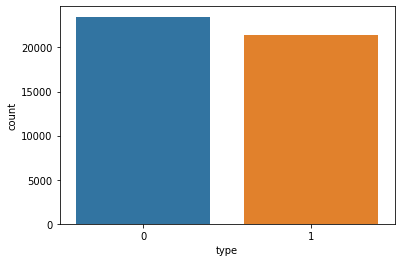

In [25]:
fig = sns.countplot(x='type',data=merged_data)
fig

Data is bit imbalanced as its observed from the above chart that fake is bit more than real but overall its better to proceed ahead as the difference is bit less and can be handled using stratified sampling while train and test data split.

In [26]:
merged_data.subject=merged_data.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})
merged_data.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,PoliticsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,PoliticsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,PoliticsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,PoliticsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,PoliticsNews,"December 29, 2017",1


Text(0.5, 1.0, 'number of words')

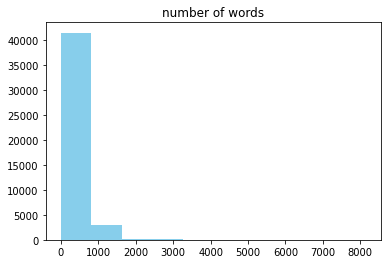

In [27]:
#Performed the number of words count for text and title fields
text_len=merged_data['text'].str.split().map(lambda x: len(x))
plt.hist(text_len,color='SkyBlue')
plt.title('number of words')

Text(0.5, 1.0, 'number of words')

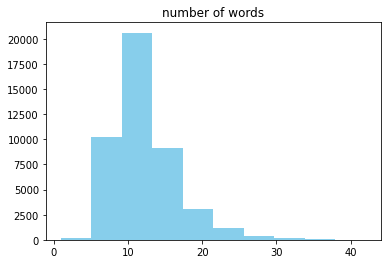

In [28]:
text_len=merged_data['title'].str.split().map(lambda x: len(x))
plt.hist(text_len,color='SkyBlue')
plt.title('number of words')

Features not included for text cleaning and modelling going forward are:
1.   Using the Date column will be tricky. If  time-series analysis is performed on the data, we  will see that 2015 only has Fake news and no Real news, so that will create some bias towards the fake news.Also, Real news is less in number till mid-2017, after which the number increases by a lot as compared to fake news.It will require a lot of data processing just to include the date feature in the model.
2.  Also, the title is like a summary of the original text in each article, so it is not necessary to use the title.
Subject column can be removed as it only represents the type of news.Hence the column on which text cleaning and modelling will be performed is text feature.

In [29]:
###ngram analysis
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [30]:
merged_data.text.apply(lambda txt:basic_clean(txt))

0        [WASHINGTON, Reuters, The, head, conservative,...
1        [WASHINGTON, Reuters, Transgender, people, all...
2        [WASHINGTON, Reuters, The, special, counsel, i...
3        [WASHINGTON, Reuters, Trump, campaign, adviser...
4        [SEATTLEWASHINGTON, Reuters, President, Donald...
                               ...                        
44893    [21st, Century, Wire, say, As, 21WIRE, reporte...
44894    [21st, Century, Wire, say, It, familiar, theme...
44895    [Patrick, Henningsen, 21st, Century, WireRemem...
44896    [21st, Century, Wire, say, Al, Jazeera, Americ...
44897    [21st, Century, Wire, say, As, 21WIRE, predict...
Name: text, Length: 44898, dtype: object

In [31]:
real_words = basic_clean(''.join(str(merged_data[merged_data.type==1].text.tolist())))
fake_words = basic_clean(''.join(str(merged_data[merged_data.type==0].text.tolist())))

In [32]:
real_trigrams_series = (pd.Series(nltk.ngrams(real_words, 3)).value_counts())[:20]
fake_trigams_series = (pd.Series(nltk.ngrams(fake_words, 3)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

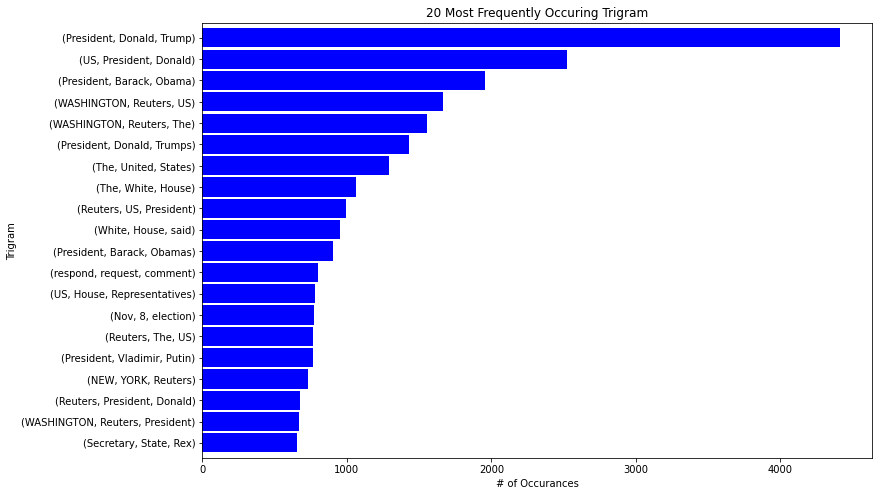

In [33]:
real_trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigram')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

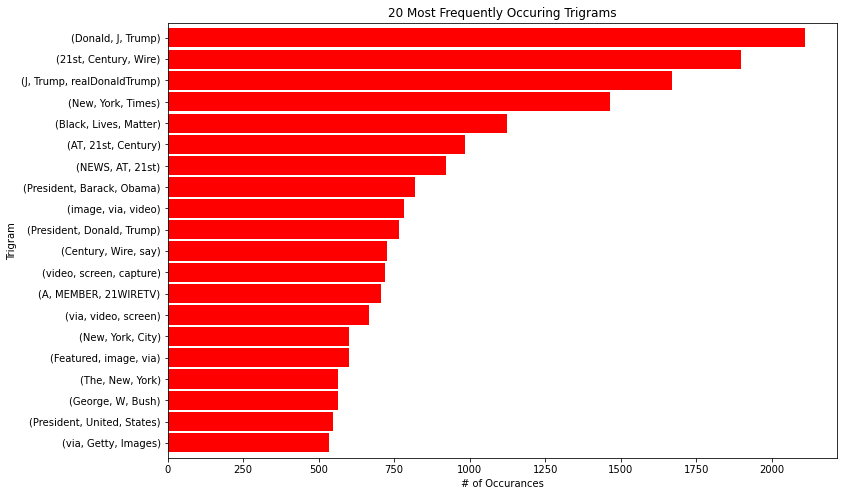

In [34]:
fake_trigams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

From the above trigram analysis its noticed that there is some news that ruled the US media-’Black lives matter’ after the demise of Floyd. Its observed that news has been covered in the data. There was a lot of fake news revolved around death.
The rest is about US politics.

## **Text Cleaning**
Text cleaning is performed cleaning steps by creating a function that performs  punctuations removal ,contractions removal ,tokenization, lower case conversion,stop words removal,lemmatization(infection words analysis and its processing by converting to root words and retrieving the meaning of the word),joined back all the words.

In [35]:
%%time
def clean_data(txt):
    """""
    cleans the input text in the following steps
    1- replace contractions
    2- removing punctuation
    3- spliting into words
    4- removing stopwords
    5- removing leftover punctuations
    """""
    contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    def _get_contractions(contraction_dict):
        contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
        return contraction_dict, contraction_re

    def replace_contractions(text):
        contractions, contractions_re = _get_contractions(contraction_dict)
        def replace(match):
            return contractions[match.group(0)]
        return contractions_re.sub(replace, text)

    # replace contractions and convert to lowercase
    txt = txt.lower()
    txt = replace_contractions(txt)
    
    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)
    
    # split into words
    words = word_tokenize(txt)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]

    lemmatizer = nltk.stem.WordNetLemmatizer()
    def lemmatize_text(txt):
        return [lemmatizer.lemmatize(w) for w in words]

    cleaned_text = ' '.join(words)
    return cleaned_text
    
merged_data['data_cleaned'] = merged_data['text'].apply(lambda txt: clean_data(txt))


CPU times: user 2min 15s, sys: 1.68 s, total: 2min 17s
Wall time: 2min 17s


In [36]:
pd.set_option('display.max_colwidth', None) #comparision of original text and data_cleaned fields
merged_data[['data_cleaned','text']].head(1)

data_cleaned                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [37]:
len(merged_data['data_cleaned'].max())

502

### **Word Cloud analysis**

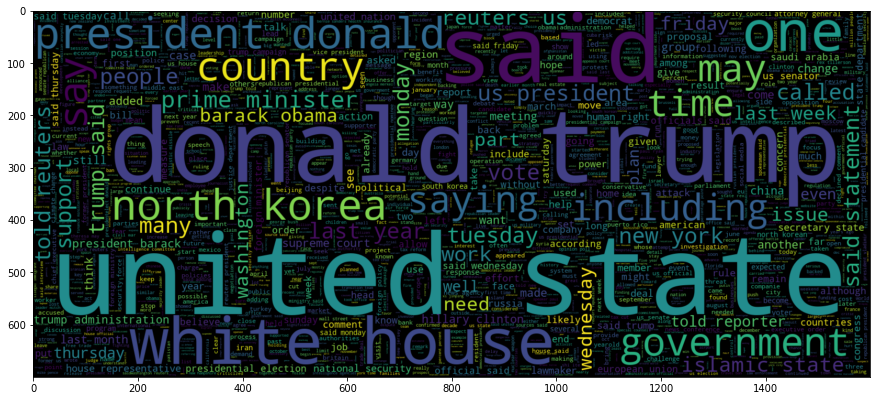

In [38]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(merged_data[merged_data.type==1].data_cleaned))
plt.imshow(wc, interpolation="bilinear")

From the word cloud of true news its about north korea vs US There are news about budget aid from the government also.

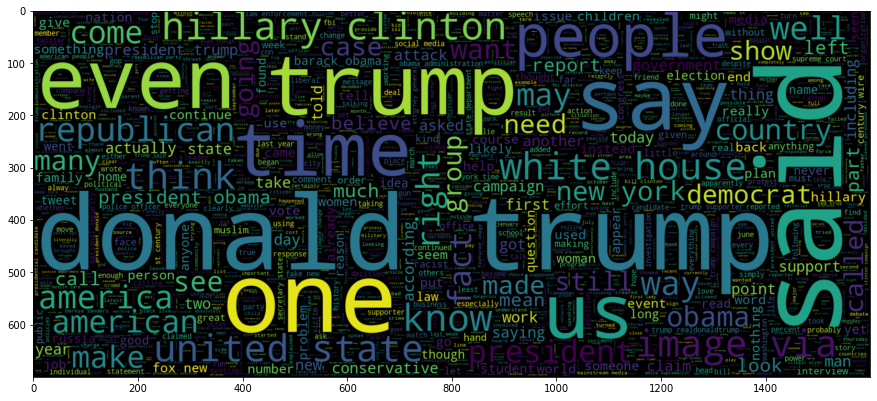

In [39]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(merged_data[merged_data.type==0].data_cleaned))
plt.imshow(wc, interpolation="bilinear")

In [40]:
###Ngram analysis on real and fake news
###For real news 
data_cleaned_gram=list(merged_data.data_cleaned)
true_bigrams_series = (pd.Series(nltk.ngrams(data_cleaned_gram, 6)).value_counts())[:20]
true_bigrams_series


(tune alternate current radio network acr another live broadcast boiler room tonight pm pst pm cst pm est special broadcast join us uncensored uninterruptible talk radio custommade bar fly philosophers misguided moralists masochists street corner evangelists mediamaniacs savants political animals otherwise lovable rascalsjoin acr hosts hesher spore along funk soul randy j stewart howe acrwire contributors andy nowicki author conspiracy compliance control defiance hundred first episode boiler room water kids put plants bed get favorite mead horn ready drop deep boiler room crewtonight gang surprise visit former libertarian presidential nominee hopeful technology guru john mcafee discuss significance vault data dump ludicrous concept russian hacks dnc election utter loss privacy potential cyberfalseflags new age warfarelisten boiler room st patrick cyberpocalypse john mcafee spreakerdirect download episode please like share program visit donate page get involvedreference links, consortiu

In [41]:
#Modelling libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [42]:
X_train, X_test, y_train, y_test = train_test_split(merged_data['data_cleaned'], merged_data['type'], test_size = 0.3, random_state= 1,stratify=merged_data['type'])

In [43]:
index =merged_data['data_cleaned'].str.len().idxmax()



merged_data['data_cleaned'][index]

'discovered another reason support nfl man antiamerican person know connected national football league players association nflpa nflpa recently financially supported veritable list farleft organizations planned parenthood organizations protesting deportation illegal immigrants among many others one recipient none open society foundation chaired billionaire george sorosndvote found nflpa provides financial support soros center community change action social justice arm organization according washington free beacon involved direct action president donald trump republicans november elections nflpa donating several farleft antitrump causes dating back least soros long history funding radical farleft causes united stateshe known supported occupy wall street protests national resource defense council antitrump environmental organization proabortion movements including planned parenthood well numerous antitrump resistance causessoros also funded least key partners women march washington occur

In [44]:
res = max(len(ele) for ele in merged_data['data_cleaned'])
  
# printing result
print("Length of maximum string is : " + str(res))

Length of maximum string is : 38698


In [45]:
classifiers = [LogisticRegression(max_iter=200),SGDClassifier(loss="hinge", penalty="l2"),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), 
               RandomForestClassifier(),MultinomialNB()]

In [46]:

def get_prediction(vectorizer, classifier, xtrain, xtest, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(xtrain, y_train)
    y_pred = model.predict(xtest)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred,labels=[0,1])
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))
    ax = sns.heatmap(cm, annot=True, fmt='g')
    ax.set_title('Confusion Matrix with News labels')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual');
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels([0,1])
    plt.show()



 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***********Usng TFIDF Vectorizer****************
Accuarcy: 98.66
Confusion Matrix: 
 [[6949   96]
 [  84 6341]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



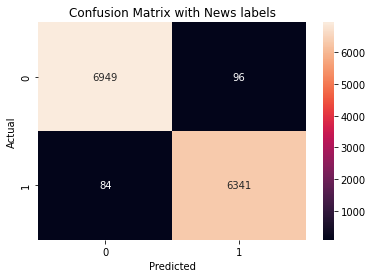

***********Usng Count Vectorizer****************
Accuarcy: 99.66
Confusion Matrix: 
 [[7021   24]
 [  22 6403]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



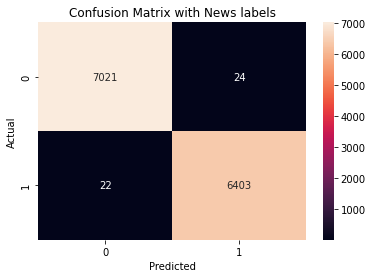



 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
***********Usng TFIDF Vectorizer****************
Accuarcy: 99.12
Confusion Matrix: 
 [[6979   66]
 [  53 6372]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



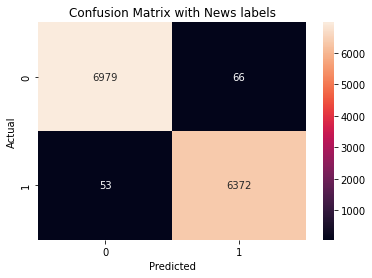

***********Usng Count Vectorizer****************
Accuarcy: 99.5
Confusion Matrix: 
 [[7005   40]
 [  28 6397]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7045
           1       0.99      1.00      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



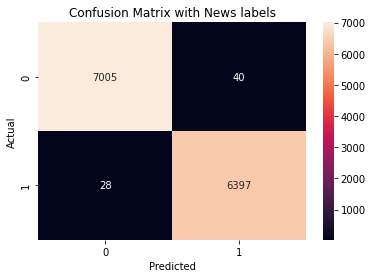



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
***********Usng TFIDF Vectorizer****************
Accuarcy: 63.56
Confusion Matrix: 
 [[6978   67]
 [4842 1583]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.99      0.74      7045
           1       0.96      0.25      0.39      6425

    accuracy                           0.64     13470
   macro avg       0.77      0.62      0.57     13470
weighted avg       0.77      0.64      0.57     13470



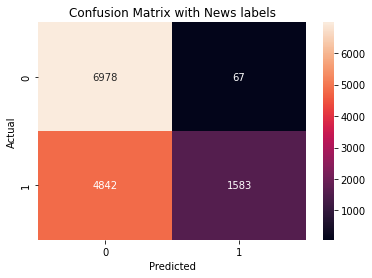

***********Usng Count Vectorizer****************
Accuarcy: 78.83
Confusion Matrix: 
 [[5418 1627]
 [1224 5201]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      7045
           1       0.76      0.81      0.78      6425

    accuracy                           0.79     13470
   macro avg       0.79      0.79      0.79     13470
weighted avg       0.79      0.79      0.79     13470



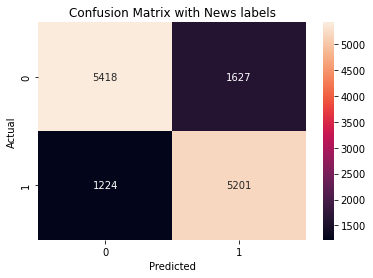



 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
***********Usng TFIDF Vectorizer****************
Accuarcy: 99.61
Confusion Matrix: 
 [[7023   22]
 [  31 6394]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



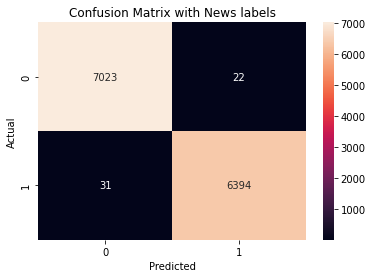

***********Usng Count Vectorizer****************
Accuarcy: 99.61
Confusion Matrix: 
 [[7016   29]
 [  23 6402]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



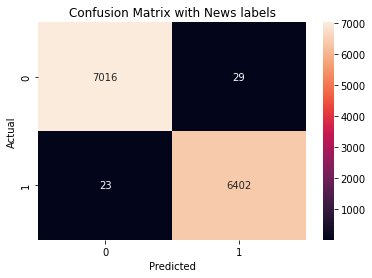



 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
***********Usng TFIDF Vectorizer****************
Accuarcy: 99.2
Confusion Matrix: 
 [[6988   57]
 [  51 6374]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.9

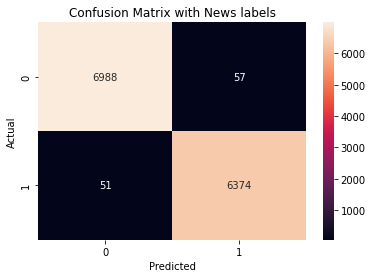

***********Usng Count Vectorizer****************
Accuarcy: 98.98
Confusion Matrix: 
 [[6956   89]
 [  48 6377]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.99      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



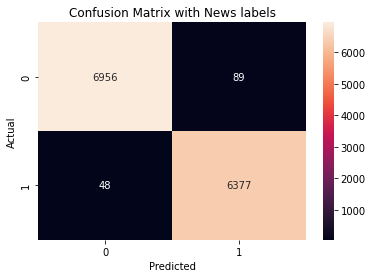



 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
***********Usng TFIDF Vectorizer****************
Accuarcy: 94.12
Confusion Matrix: 
 [[6612  433]
 [ 359 6066]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7045
           1       0.93      0.94      0.94      6425

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



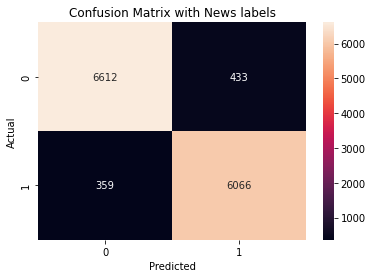

***********Usng Count Vectorizer****************
Accuarcy: 95.58
Confusion Matrix: 
 [[6705  340]
 [ 255 6170]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7045
           1       0.95      0.96      0.95      6425

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



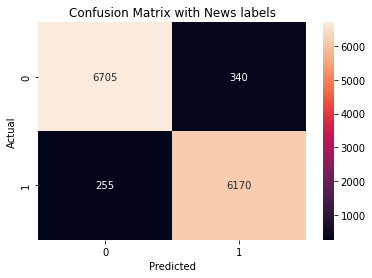

In [47]:
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)

**Decision tree is giving good results of all with accuracy 99.7% & 99.6% when used with tfidf vectorizer and count vectorizer**

Accuarcy: 99.64
Confusion Matrix: 
 [[7023   22]
 [  27 6398]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



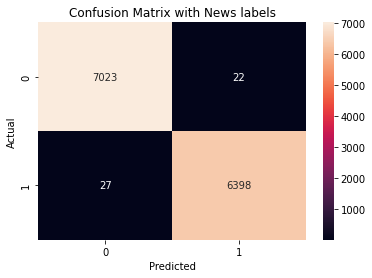

In [48]:
pipe = Pipeline([('vector', TfidfVectorizer()),
                    ('model', DecisionTreeClassifier())])
model_dec_tree = pipe.fit(X_train, y_train)
y_pred = model_dec_tree.predict(X_test)
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
cm = confusion_matrix(y_test, y_pred,labels=[0,1])
print("Confusion Matrix: \n", cm)
print("Classification Report: \n", classification_report(y_test, y_pred))
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Confusion Matrix with News labels')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels([0,1])
plt.show()
predicted_df = pd.DataFrame(data=y_pred, columns=['y_pred'], index=X_test.index.copy())

Sample output of predictions 

In [49]:
my_new_df = pd.concat([X_test,y_test, predicted_df], axis =1)
my_new_df.head()

,data_cleaned,type,y_pred
38380,house moves closer actually representing people vote really mean terms stopping bleed muslim men syrian refugees countrythe american security foreign enemies act approved us house afternoon prohibit syrian refugees muslim males entering country ensures carefully screened congress needs act stop flow potential terrorists mostly military age muslim men conditioned hating america entire lives countrythe house representatives approved legislation would make even difficult refugees syria iraq enter united statesour imperial president barack hussein obama already said veto bill almost unanimous support republicans democrats supporting house approved votes american security foreign enemies act would require secretary homeland security fbi director director national intelligence certify refugee threat national security admitted united statesthis certification would come top preexisting extensive screening process refugees seeking admittance united states currently takes monthsthe white house already said president veto legislation chief staff denis mcdonough secretary homeland security jeh johnson capitol hill lobbying bill thursday however efforts sway democratic skepticsnew york democrat sean patrick maloney told reporters thought bill represented simple improvement process administration required certify many things federal law understand president direct heads agencies within hours completion existing process make certification adds new time new york congressman said offensive would stigmatize refugees make victims people suffered much already said think bill unlike reactions many governors republican president candidates refugee issue instead insisted represented simple step provide certification preexisting screening processdemocratic opponents bill representative emanuel cleaver missouri dismissed legislation something simply designed make people feel better however noted failure among politicians parties acknowledge legitimate real fear cleaver echoed remarks made reporters yesterday democratic senator tim kaine complained obama administration properly explained vetting system refugees american public republicans realistic bill dim prospects becoming law saw important step raising public awareness refugee issue iowa congressman steve king told guardian said little congress could pass would avoid veto bill brings public attention king said thought increased public attention would make harder obama veto bill would also need pass senate become law might even make possible obama veto overridden congress however king thought focus refugee issue missed point instead need destroy caliphates defeat ideology islamic jihad king said equivalent going emergency room patients bleeding gurneys going getting bucket mop mop instead stopping bleeding thoughts echoed part tim huelskamp kansas noted many constituents worried whether syrian refugees properly vetted since paris attacksthe kansas republican saw bill prelude fight december budget seeing possibility attaching rider refugee policy appropriations spending bill think president gon na shut government bring syrian refugees country way get attention said via guardian,0,0
35154,would hope wise latina woman richness experiences would often reach better conclusion white male lived life supreme court justice sotomayoras main stream media hit job donald trump expressing view presiding judge trump university case biased trump views immigration racist latina supreme court justice openly declaring ethnicity sex judge makes difference judging left wants ways outed total hypocrites unreal judge sotomayor questioned whether achieving impartiality possible even cases added wonder whether ignoring differences women men color disservice law society calling trump racistwashington sonia sotomayor appeals court judge gave speech declaring ethnicity sex judge may make difference judging speech judge sotomayor questioned famous notion often invoked justice ruth bader ginsburg 

In [61]:
from google.colab import files
my_new_df.to_csv('predicted.csv')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
true_new =['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid.']
model_dec_tree.predict(true_new)

array([1])

In [52]:
fake_new =['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.']
model_dec_tree.predict(fake_new)

array([0])

In [53]:
print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [54]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.996362286562732
